<img src="imagenes/rn3.png" width="200">
<img src="http://www.identidadbuho.uson.mx/assets/letragrama-rgb-150.jpg" width="200">

# [Curso de Redes Neuronales](https://curso-redes-neuronales-unison.github.io/Temario/)

# Una sola neurona lineal

[**Julio Waissman Vilanova**](http://mat.uson.mx/~juliowaissman/) 

*Ultima revisión*: 31 de enero de 2019.

En esta libreta vamos a revisar los aspectos básicos del aprendizaje para una sola neurona de salida lineal, sin capas ocultas y usando el criterio de pérdida MSE. El algoritmo es muy simple pero es importante tener claro lo que se requiere antes de pasar a cosas más complicadas.

Empecemos por inicializar los modulos que vamos a requerir.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16,8)
plt.style.use('ggplot')

# 1. Un ejemplo en una sola dimensión

Una función muy importante para poder realizar aprendizaje máquina es la capacidad de poder manejar, cargar y guardar datos. en esta libreta vamos a empezar con lo más básico: leer datos desde un archivo texto (o un archivo.cvs). Más adelante revisaremos como recolectar datos de internet, de archivos tipo excel o de bases de datos.

*Numpy* cuenta con varios métodos para leer y guardar datos. La más utilizada para cargar datos provenientes de un archivo de texto es `loadtxt`. Para obtener la documentación de la función, simplemente ejecuta la celda siguiente: 

In [4]:
np.loadtxt?

Signature:
np.loadtxt(
    fname,
    dtype=<class 'float'>,
    comments='#',
    delimiter=None,
    converters=None,
    skiprows=0,
    usecols=None,
    unpack=False,
    ndmin=0,
    encoding='bytes',
    max_rows=None,
)
Docstring:
Load data from a text file.

Each row in the text file must have the same number of values.

Parameters
----------
fname : file, str, or pathlib.Path
    File, filename, or generator to read.  If the filename extension is
    ``.gz`` or ``.bz2``, the file is first decompressed. Note that
    generators should return byte strings for Python 3k.
dtype : data-type, optional
    Data-type of the resulting array; default: float.  If this is a
    structured data-type, the resulting array will be 1-dimensional, and
    each row will be interpreted as an element of the array.  In this
    case, the number of columns used must match the number of fields in
    the data-type.
comments : str or sequence of str, optional
    The characters or list of characters 

Es importante ver que esta función directamente carga los datos existentes en el archivo en un `ndarray`. ¿Y si tenemos uno o varios `ndarrays` con las cosas que hemos desarrollado y los queremos guardar en disco (por ejemplo el vector $\omega$ de parámetros)? 

Vamos a abrir y a visualizar unos datos que se encuentran en el archivo `carretas.txt` (abrelos con un editor de texto si quieres ver el archivo original). En este archivo se tiene las ganancias anuales (en dolares) de unos tacos de carreta (bueno, su equivalente gringo) respecto al tamaño de la ciudad donde se encuentra la carreta. Estos datos provienen de el curso de *Machine learning* de *coursera* de *Andrew Ng*.


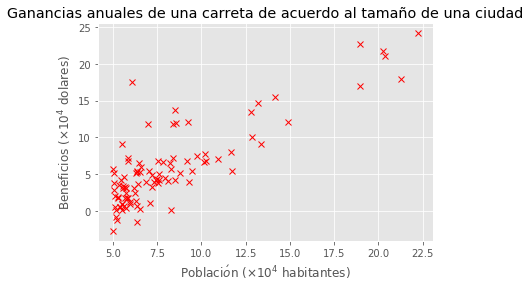

In [5]:
# Lee los datos en un nd array llamado datos
datos = np.loadtxt('datos/carretas.txt', comments='%', delimiter=',')

# Separa los datos de entrada de los de salida.
# si decimos que x = datos[:,0], pues se toma solo una columna de datos,
# por lo que x sería un ndarray de forma (shape) (96,). Al decir x = datos[:, 0:1] 
# significa que vamos a tomar todas las columnas de 0 a una antes de 1, por lo
# que x tiene una forma (96, 1). Para mantener generalidad, es mejor manejar x xomo una matriz
# de una sola columna que como un vector de una dimensión.
x, y = datos[:,0:1], datos[:,1]

# T es el número de instancias y n el de atributos
T, n = x.shape

plt.plot(x, y, 'rx')
plt.title(u'Ganancias anuales de una carreta de acuerdo al tamaño de una ciudad')
plt.xlabel(r"Poblaci$\'o$n ($\times 10^4$ habitantes)")
plt.ylabel(r'Beneficios ($\times 10^4$ dolares)')
plt.show()

Listo, ya temos los datos. La hipótesis que hacemos es que el valor de salida lo podemos estimar como

$$
\hat{y}^{(i)} = h_\omega(x^{(i)}) = \omega_1 x^{(i)} + b
$$


El criterio MSE como función de pérdida es el de minimizar el costo definido como
$$
Loss(\omega, b) = \frac{1}{2M} \sum_{i = 1}^M (y^{(i)} - \hat{y}^{(i)})^2.
$$

Por lo tanto, para saber si estamos minimizando o no, debemos ser capaces de medir la función de pérdida. 

**Desarrolla la función de pérdida tal como se pide abajo**

In [6]:
def mse_loss(x, y, w, b):
    """
    Calcula el costo de acuerdo al criterio de MSE (mean square error) asumiendo un conjunto de datos
    x, con una salida y, y una hipótesis lineal parametrizada por omega
    
    Parámetros
    ----------
    x: Un ndarray de dimension (M, n)
    y: Un ndarray de dimensión (M, )
    w: Un ndarray de dimensión (n, )
    b: Un flotante
    
    Devuelve
    --------
    Un flotante con el costo
    
    """
    M, n = x.shape
        
    # Puedes hacerlo en forma de ciclos
    J = 0
    for i in range(M):
        y_ = w*x[i] + b
        J += pow(y[i] - y_,2)
    return J/(2*M)
    
    # Puedes hacerlo directamente en forma matricial (así debería de ser)
    # Proximamente ..
    

y para probar si está bien el programa, si calculamos $Loss(\omega, b)$ para $\omega_1 = 0$, $b = 1$ debe de dar (para este conjunto de datos) **26.73** (recuerda verificar que regrese un flotante y no un vector de un solo elemento).

In [7]:
w = np.zeros([n])
w1 = 0
b = 1
print("La pérdida es {}".format(mse_loss(x, y, w1, b)))

La pérdida es [26.73359883]


Muy bien, ya podemos calcular el criterio a optimizar (la función de pérdida). Vamos entonces a utilizar la función que acabamos de hacer para ver sus valores para diferentes valores de $\omega$ y $b$.

Text(0.5, 1.0, 'Funcion de perdida')

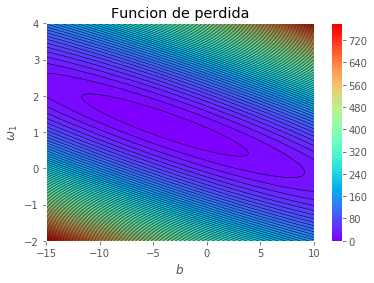

In [8]:
# Definimos una función que depende solo de b y theta1
def costo_w(b, w1):
    return mse_loss(x, y, np.array([w1]), b)

# Y ahora la convertimos en una función tipo numpy (aplica para cualquier entrada de ndarrays)
costo_vect = np.frompyfunc(costo_w, 2, 1)

#Ahora generamos la lista de valores para graficar
b = np.linspace(-15, 10, 100);
w1 = np.linspace(-2, 4, 100);

# Y los convertimos en matrices utilizando la función meshgrid
b, w1 = np.meshgrid(b, w1)

# Y calculamos los costos para cada par de theta0 y theta 1 con nuestra nueva funcion de costos vectorizada
J = costo_vect(b, w1)

# Y graficamos el contorno
plt.contour(b, w1, J, 80, linewidths=0.5, colors='k')
plt.contourf(b, w1, J, 80, cmap=plt.cm.rainbow, vmax=J.max(), vmin=J.min())
plt.colorbar()
plt.xlabel(r"$b$")
plt.ylabel(r"$\omega_1$")
plt.title(r"Funcion de perdida")
        

Ahora si, ya tenemos todo para hacer nuestra función para encontrar los parámetros que optimicen la función de costo (que como se puede ver en la superficie debería de estar por donde $b$ vale entre 0 y -5 y $\omega_1$ entre 1 y 2). 

**Desarrolla la función con descenso de gradiente.**

In [11]:
def grad_costo(x, y, w, b):
    """
    Calcula el gradiente respecto a w y b de los datos existentes
    
    Parámetros
    ----------
    x: ndarray de dimension [M, n] con los datos de entrada
    y: ndarray de dimension [M,] con los datos de salida
    w: ndarray de dimension [n, ] con los pesos 
    b: flotante con el sesgo 
    
    Devuelve
    --------
    dw, db: donde dw es un vector de dimension de w con el gradiente
            de la función de costo respecto a w, y db es la derivada de la
            funcion de costo respecto a b

    """
    error = y - (x @ w + b)

    # --aqui hay que poner código--        
    dw = error @ x
    db = np.sum(error)
    #------------------------------

    return dw, db 

def descenso_gradiente_lotes(x, y, w_0, b_0, alpha, num_iter):
    """
    Descenso de gradiente durante num_iter iteraciones para regresión lineal
    
    Parámetros
    -----------
    x: ndarray de dimension [M, n] con los datos de entrada
    y: ndarray de dimension [M,] con los datos de salida
    w_0: ndarray de dimension [n, ] con los pesos iniciales
    b_0: flotante con el sesgo inicial
    alpha: flotante con tamaño de paso o tasa de aprendizaje.
    num_iter: numero de iteraciones (entero)
    
    Devuelve
    --------
    w, b, mse_iter: donde w y b tiene las dimensiones de w_0 y b_0 con los parámetros 
                    aprendidos, mientras que mse_hist es un ndarray de dimensión 
                    [num_iter, 1] con el costo en cada iteración.
    
    """
    w, b = w_0.copy(), b_0
    mse_iter = np.zeros(num_iter)    
    M, n = x.shape
    
    for iter in range(num_iter):
        
        dw, db = grad_costo(x, y, w, b)
        
        # --aqui hay que poner código--        
        w += (alpha/M) * dw
        b += (alpha/M) * db
        #------------------------------
        
        mse_iter[iter] = mse_loss(x, y, w, b)

    return w, b, mse_iter
     

Y para saber si el algoritmo se programo bien, se puede probar en el problema del *food truck* y revisar si el valor de la función de pérdida se va reduciendo hasta estabilizarse en un mínimo.

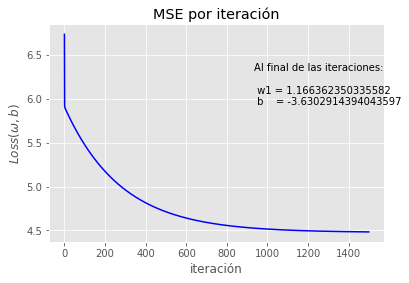

In [12]:
w_0 = np.zeros((n,))
b_0 = 0.0

iteraciones = 1500
alpha = 0.01

w, b, mse_historial = descenso_gradiente_lotes(x, y, w_0, b_0, alpha, iteraciones)


plt.plot(mse_historial, 'b')
plt.title(u'MSE por iteración')
plt.xlabel(u'iteración')
plt.ylabel(r'$Loss(\omega, b)$')
plt.figtext(x=.6, y=.6, s="Al final de las iteraciones:\n\n w1 = {}\n b    = {}".format(w[0], b))
plt.show()

Ahora vamos a revisar virtualmente si la estimación es una linea recta que pasa entre todos los puntos.

**Completa los pasos para realizar la estimación.**

In [13]:
x_estimar = np.array([[4],[24]])

#
# Agrega el codigo necesario
#
y_estimado = w @ x_estimar.T + b


print("Los valores estimados son: {}".format(y_estimado))

Los valores estimados son: [ 1.03515796 24.36240497]


Si los valores que obtuviste son cercanos a 1 (10000 dolares) y 24.3 (243000 dolares) entonces estamos en los valores esperados. Ahora vamos a usar estos valores para graficar los datos reales y la estimación realizada:

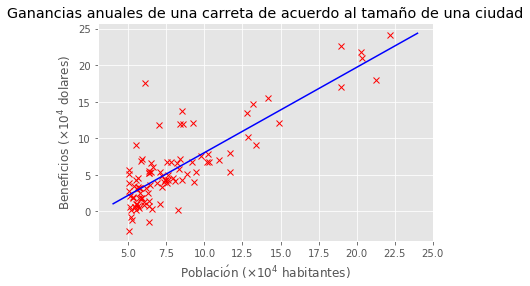

In [15]:
plt.plot(x[:], y, 'xr')
plt.plot(x_estimar[:,0], y_estimado, '-b')
plt.title(u'Ganancias anuales de una carreta de acuerdo al tamaño de una ciudad')
plt.xlabel(r"Poblaci$\'o$n ($\times 10^4$ habitantes)")
plt.ylabel(r'Beneficios ($\times 10^4$ dolares)')
plt.show()

**¡Felicidades!** Acabas de terminar el algoritmo de aprendizaje más usado en el mundo.

# 2. Un ejemplo en multiples dimensiones

Como el algortimo realizado ya funciona para muchas dimensiones, no se espera tener mucho problema para utilizarlos. Así que ahora vamos a cargar datos y vamos a graficar la salida respecto a dos variables

In [ ]:
datos = np.loadtxt('datos/casas_portland.txt', comments='%', delimiter=',')
x, y = datos[:, :-1], datos[:,-1] 

# M es el número de instancias y n el de atributos
M, n = x.shape

plt.plot(x[:,0], y, 'rx')
plt.title(u'Costo de una casa en relación a su tamaño')
plt.xlabel(u"tamaño (pies cuadrados)")
plt.ylabel('costo ')

plt.figure()
plt.plot(x[:,1], y, 'rx')
plt.title(u'Costo de una casa en relación al número de cuartos')
plt.xlabel("cuartos")



Antes de realizar el aprendizaje podemos ver que mientras una de las variables se mide en miles de pies cuadrados, la otra variable tiene valores de 1 a 4. Esto es un problema para el algoritmo del descenso de gradiente, por lo que es necesario normalizar los datos (solo para este algoritmo) y que funcione de manera correcta. 

Para normalizar requerimos de dos pasos, por un lado, obtener los valores de medias y desviaciones estandares por atributo, y en segundo lugar, realizar la normalización. Los valores de medias y desviaciones estandares hay que guardarlos, ya que serán necesarios para poder normalizar los datos que se quiera estimar.

**Escribe la función que devuelve los valores de medias t desviaciones estandares.**

In [ ]:
def obtiene_medias_desviaciones(x):
    """
    Obtiene las medias y las desviaciones estandar atributo a atributo.
    
    Parámetros
    ----------
    x: un ndarray de dimensión (T, n) donde T es el númro de elementos y 
       n el número de atributos
    
    Devuelve
    ---------
    medias, desviaciones: donde ambos son ndarrays de dimensiones (n,) con 
                          las medias y las desviaciones estandar respectivamente.
    
    """
    # Escribe aqui el código
    #
    #
    #    

    
def normaliza(x, medias, desviaciones):
    """
    Normaliza los datos x

    Parámetros
    ----------
    x: un ndarray de dimensión (T, n) donde T es el númro de elementos y n el número de atributos
    medias: ndarray de dimensiones (n,) con las medias con las que se normalizará
    desviaciones: ndarray de dimensiones (n,) con las desviaciones con las que se normalizará
    
    Devuelve
    --------
    x_norm, un ndarray de las mismas dimensiones de x pero normalizado
    
    """
    return (x - medias) / desviaciones
        

# Y ahora vamos a hacer algo muy simple para probar, que pueden corroborar con el uso de una calculadora común.
x_prueba = np.array([[1, 300],
                    [3, 100],
                    [2, 400],
                    [4, 200]])
m, d = obtiene_medias_desviaciones(x_prueba)

print("Los datos son: \n{}".format(x_prueba))
print("Las medias son: \n{}".format(m))
print("Las desviaciones son: \n{}".format(d))
print("Los datos normalizados son: \n{}".format(normaliza(x_prueba, m, d)))


Listo, entonces ya podemos hacer descenso de gradiente, o casi. El problema es que no sabemos cual sería el mejor valor para $\alpha$. Escoge el valor de $\alpha$ realizando una gráfica de 50 iteraciones solamente para valores desde 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, ... y decide cual de los valores es el que más te conviene.

**Selecciona un valor, especifica aquí cual es, y justifica porque lo seleccionaste.**

In [ ]:
medias, desviaciones = obtiene_medias_desviaciones(x)
x_norm = normaliza(x, medias, desviaciones)

w_ini = np.zeros((n,))
b_ini = 0
num_iters = 50

alpha = 0.0001  # Aqui es donde hay que hacer las pruebas
alpha = 0.1

_, _, mse_hist = descenso_gradiente_lotes(x_norm, y, w_ini, b_ini, alpha, num_iters)

plt.plot(mse_hist, '-b')
plt.title(r"La curva de aprendizaje para $\alpha =$ " + str(alpha))
plt.xlabel('iteraciones')
plt.ylabel('MSE')

**Utilizando las iteraciones necesarias, encuentra el valor de $\omega$ y $b$ utilizando el descenso de gradiente.**

In [ ]:
# Aqui ya no pongo código, esto debe ser relativamente simple

**Obten el valor de una casa de 1650 pies cuadrados y 3 recamaras con el modelo obtenido (recuerda que hay que normalizar).**

In [ ]:
# Escribe aquí el código



# 3. Regularización

Un detalle que se nos falta revisar es el efecto de a regularización en la regresión, y lo vamos a realizar a partir de un ejemplo sobre ajuste de curvas con polinomios, generando datos sintéticos. La función que vamos a tratar de ajustar, utilizando 20 puntos seleccionados al azar es:

$$f(x) = \exp(-\frac{x}{2}) \sin(2x)$$

Para esto, vamos a generar (utilizando una semilla común, para que todos obtengamos los mismos resultados) datos provenientes de un modelo que es un polinomio de orden superior.



In [ ]:
rng = np.random.RandomState(10)


# Función a aproximar
def f(x): return np.exp(-x/2) * np.sin(2*x)
 
# Datos para graficar
x_plot = np.linspace(0, 10, 1000)
y_plot = f(x_plot)

# Genera puntos y selecciona 20 en forma aleatoria 
x_train = np.linspace(0, 10, 100)
rng.shuffle(x_train)
x_train = np.sort(x_train[:25])
y_train = f(x_train) + 0.1 * np.random.randn(25)


# Graficamos la función original y los puntos que vamos a utilizar para el aprendizaje
plt.plot(x_plot, y_plot, label="La función original")
plt.scatter(x_train, y_train, label="datos para el entrenamiento")
plt.title("Datos sintéticos para revisar el uso de regularización")
plt.show()


Ahora vamos a ver que pasa si tratamos de ajustar un modelo con diferentes polinomios. La generación de atributos polinomiales la incluyo en este caso, ya que lo que nos interesa es estudiar el efecto de la regularizacion sobre todo.

Para ver el problema de utilizar el método de desceno de gradiente utilizando varias variables vamos a ver el caso sin regularizar primero. Como ejemplo, vamos a poner el resultado obtenido con el método anaítico. Como vemos (o veremos) en la figura, el uso de un polinomio de orden 20 (mayor) no ofrece forzosamente una solución que se apegue a la función original.

In [ ]:
plt.plot(x_plot, y_plot, label="La función original")
plt.scatter(x_train, y_train, label="datos para el entrenamiento")

for g in [3, 5, 8, 15]:

    # Expansión a un polinomio de orden ng
    x_g = np.power(x_train.reshape(-1,1), range(0, g + 1))
    x_g_plot = np.power(x_plot.reshape(-1,1), range(0, g + 1))
    
    w = np.linalg.pinv(x_g) @ y_train    
    y_g = x_g_plot @ w 
    
    plt.plot(x_plot, y_g, label="polinomio orden {}".format(g))
    
plt.legend()
plt.axis([0, 10, -0.5, 1])
   
    


El método de descenso de gradiente está lejos de ser un método óptimo y/o eficiente, cuando se tiene soluciones analíticas, o cuando es posible obtener en forma analítica la segunda derivada (y por lo tanto metodos como gradiente conjugado o el de Newton se pueden realizar). Con el fin de ilustrar esto, realiza los siguientes ejercicios.

**Desarrolla una función que utilice el método de descenso de gradiente y obtenga 
resultados similares a los de la ecuación normal.**

**¿Que pasa si no utlizas la normalización de datos?**

**¿Cuál es la mejor $\alpha$ para el ajuste del polinomio de orden 8?**

**¿Cuál es el número ideal de *epochs*?**

In [ ]:

plt.plot(x_plot, y_plot, label="La función original")
plt.scatter(x_train, y_train, label="datos para el entrenamiento")

for g in [3, 5, 8, 18]:

    # Expansión a un polinomio de orden ng
    x_g = np.power(x_train.reshape(-1,1), range(1, g + 1))
    x_g_plot = np.power(x_plot.reshape(-1,1), range(1, g + 1))

    # Escribe aqui el código
    #
    #  1. Normaliza (ambos conjuntos)
    #  2. Entrenamiento (con los datos de aprendizaje)
    #  3. Reconocimiento (con lo datos de graficación) 
    #  El resultado se guarda en y_g
    #
    #
    #

    plt.plot(x_plot, y_g, label="polinomio orden {}".format(g))
    
plt.legend()
plt.axis([0, 10, -0.5, 1]) 
plt.show()
    

La regularización es un método para poder manejar una cantidad importante de parámetrs y que siga funcionando el sistema de alguna manera. Los métodos de regularización más comunes son

- Regularización L2: $$reg(w) = w^Tw$$
- Regularización L1: $$reg(w) = \sum_{i=1}^n |\omega_i|$$

y a la función objetivo para optimización (costo) es en adelante la ponderación de la función de pérdida por la regularización.

$$costo(w, b) = Loss(w, b) + \frac{\lambda}{M} reg(w)$$

Así, el costo se usa para optimizar, aunque lo que realmente nos interese es la función de pérdida.

**Completa el código para calcular el costo y el gradiente del costo para poder ser utilizados dentro del algoritmo de descenso de gradiente.**


In [ ]:
def costo(x, y, w, b, lmda=0.0, tipo='L2'):
    """
    Calcula el costo MSE con regularización
    
    Parámetros
    ----------
    x: Un ndarray de dimension (M, n)
    y: Un ndarray de dimensión (M, )
    w: Un ndarray de dimensión (n, )
    b: Un flotante
    lmda: Un flotante con el valor de lambda para la regularización
    tipo: string con el tipo de regularización ('L2' o 'L1')
    
    Devuelve
    --------
    Un flotante con el costo    
    
    """
    M, n = x.shape
    return mse_loss(x, y, w, b) + (lmda / M) * reg(w, tipo)

def reg(w, tipo):
    """
    Calcula la regularización, que solo depende de los parámetros

    Parámetros
    ----------
    w: Un ndarray de dimensión (n, )
    tipo: string con el tipo de regularización ('L2' o 'L1')
    
    Devuelve
    --------
    Un flotante con el valor del costo de regularización

    """
    if tipo is 'L2':
        #
        # Escribe aqui tu código
        #
    elif tipo is 'L1':
        #
        # Escribe aqui tu código
        #
    else:
        raise ValueError("Solo está programada por el momento la regularización para L1 y L2")        
    return None


def grad_costo_reg(x, y, w, b, lmda, tipo):
    """
    Calcula el gradiente respecto a w y b de los datos existentes
    
    Parámetros
    ----------
    x: ndarray de dimension [M, n] con los datos de entrada
    y: ndarray de dimension [M,] con los datos de salida
    w: ndarray de dimension [n, ] con los pesos 
    b: flotante con el sesgo 
    lmda: Un flotante con el valor de lambda para la regularización
    tipo: string con el tipo de regularización ('L2' o 'L1')
    
    Devuelve
    ---------
    dw, db donde dw es un vector de dimension de w con el gradiente
           de la función de costo respecto a w, y db es la derivada de la
           funcion de costo respecto a b

    """
    M, n = x.shape
    
    error = y - (x @ w + b)
    
    # --aqui hay que poner código--        

    
    
    #------------------------------

    return dw, db 

    
def des_grad_regu(x, y, w_0, b_0, alpha, num_iter, lmda, tipo):
    """
    Descenso de gradiente durante num_iter iteraciones para regresión lineal
    
    Parámetros
    ----------
    x: ndarray de dimension [M, n] con los datos de entrada
    y: ndarray de dimension [M,] con los datos de salida
    w_0: ndarray de dimension [n, ] con los pesos iniciales
    b_0: flotante con el sesgo inicial
    alpha: flotante con tamaño de paso o tasa de aprendizaje.
    num_iter: numero de iteraciones (entero)
    lmda: Un flotante con el valor de lambda para la regularización
    tipo: string con el tipo de regularización ('L2' o 'L1')
    
    Devuelve
    --------
    w, b, mse_iter: donde w y b tiene las dimensiones de w_0 y b_0 con los parámetros aprendidos, 
                    mientras que mse_hist es un ndarray de dimensión [num_iter, 1] con el costo en cada iteración.
    
    """
    w, b = w_0.copy(), b_0
    costo_iter = np.zeros(num_iter)    
    M, n = x.shape
    
    for iter in range(num_iter):
        dw, db = grad_costo(x, y, w, b)
            
        # --aqui hay que poner código--        

        
        #------------------------------
        
        costo_iter[iter] = costo(x, y, w, b, lmda, tipo)

    return w, b, costo_iter

# Y para asegurarnos que funciona vamos a probar con un problema de juguete
# que se puede resolver  mano para estar seguros que está bien programado

w, b = np.array([1., 2., -2., 1., 1.]), 0.1

assert reg(w, 'L1') == 7
assert reg(w, 'L2') == 11

x = np.array([[1, 0, 0,  0, -1],
              [0, 1, -1, 0,  0]])
y = np.array([0.5, 3.8])

for lmbda in [0, .1, 1, 10, 100]:
    assert abs(costo(x, y, w, b, lmbda, tipo='L1') - (0.25 / 4  + lmbda * 7 / 2)) < 1e-6
    assert abs(costo(x, y, w, b, lmbda, tipo='L2') - (0.25 / 4  + lmbda * 11 / 2)) < 1e-6

    dw, db = grad_costo_reg(x, y, w, b, lmbda, tipo='L2')
    assert np.abs(dw - (np.array([-.2, .15, -.15, 0, .2]) + lmbda * w)).sum() < 1e-6

    dw, db = grad_costo_reg(x, y, w, b, lmbda, tipo='L1')
    assert np.abs(dw - (np.array([-.2, .15, -.15, 0, .2]) + lmbda * np.sign(w) / 2)).sum() < 1e-6

Ahora, yo voy a probr con la regularización, pero utilizando el método analítico por pseudoinversa que es muy eficiente, y les dejo a ustedes la tarea de batallar con el descenso de gradiente, con el fin que vean la ventaja de utilizar regularización. Para esto, vamos a resolver el problema con la regularización $L2$, para la cual existe ua solución analítica muy parecida a la pseudoinversa..

Todos los pasos para derivar la regularización en $L2$ y algunas sobre la regularización en $L1$ se pueden encontrar [en esta presentación](http://eniac.cs.qc.cuny.edu/andrew/gcml/lecture5.pdf). La formula analítica para la regresión lineal con regularización $L2$ está dada por:

$$
w^* = (X^TX + \lambda I_0)^{-1}X^T Y
$$
donde $I_0$ es una matriz diagonal a la cual el elemento $I_{1,1}$ se asigna a $0$ (para no incluir el sesgo en la regularización).

Por ejemplo, si hacemos la regresion lineal con un polinomio de décimo grado, conforme $\lambda$ aumenta, el error de validación y de prueba se modifican de la siguiente manera:

In [ ]:
grado = 10
x_g = np.power(x_train.reshape(-1,1), range(0, grado + 1))
x_g_plot = np.power(x_plot.reshape(-1,1), range(0, grado + 1))

M_train = x_train.shape[0]
M_plot = x_plot.shape[0]

I_0 = np.eye(grado + 1)
I_0[0, 0] = 0.0

lambdas = 0.001 * np.array([0, .01, .05, 0.1, 0.5, 1, 5, 10, 50, 100, 500])
e_train = np.zeros_like(lambdas)
e_verif = np.zeros_like(lambdas)

for (i, lambd) in enumerate(lambdas):
    w = np.linalg.inv(x_g.T @ x_g + (lambd * I_0)) @ x_g.T @ y_train

    error_train = y_train - x_g @ w
    error_verif = y_plot - x_g_plot @ w
    
    e_train[i] = (error_train.T @ error_train) / (2 * M_train)
    e_verif[i] = (error_verif.T @ error_verif) / (2 * M_plot)

plt.loglog(lambdas, e_train, label="Error en muestra")
plt.loglog(lambdas, e_verif, label="Estimado de error fuera de muestra")
plt.legend()

**Prueba para distintos polinomios y responde la pregunta ¿Porqué se comporta de la manera que lo hace con el polinomio de orden 10?**

Ahora vamos a ver que pasa con las diferentes regularizacióne con el polinomio si vemos la predicción que realiza

In [ ]:
grado = 10

x_g = np.power(x_train.reshape(-1,1), range(0, grado + 1))
x_g_plot = np.power(x_plot.reshape(-1,1), range(0, grado + 1))

plt.plot(x_plot, y_plot, label="La función original", linewidth=5)
plt.scatter(x_train, y_train, label="datos para el entrenamiento")

I_0 = np.eye(grado + 1)
I_0[0, 0] = 0.0

lambdas = 0.001 * np.array([0, .01, .05, 0.1, 0.5, 1, 5, 10, 50, 100, 500])
for lambd in lambdas:
    w = np.linalg.inv(x_g.T @ x_g + (lambd * I_0)) @ x_g.T @ y_train

    y_est = x_g_plot @ w
    plt.plot(x_plot, y_est, label="polinomio orden {} y lambda = {}".format(grado, lambd))

plt.legend()
plt.axis([0, 10, -0.5, 1])   

**Escribe ahora tu función de regularización utilizando el descenso de gradiente**

Espacio para escribir conclusiones

In [ ]:
## --- Agrega aqui tu código ----


